## **ML Modeling**


Importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown "https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS"

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 28.0MB/s]


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


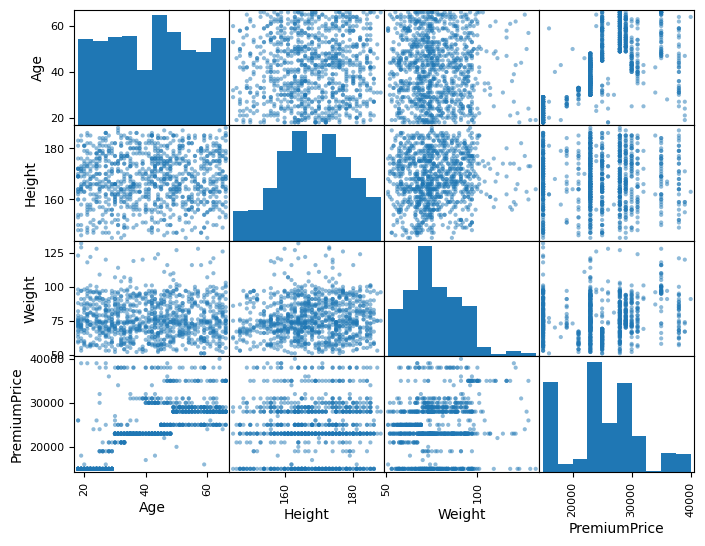

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Age','Height','Weight','PremiumPrice']

scatter_matrix(df[attributes],figsize=(8,6))
plt.show()

In [ ]:
df.shape

(986, 11)

In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
# Function to calculate BMI

def calculate_bmi(height,weight):
  return weight/(height**2)

In [ ]:
# Apply BMI calculation to DataFrame

df['BMI'] = df.apply(lambda x:calculate_bmi(x['Height'],x['Weight']),axis=1)

In [ ]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,0.002373
1,60,1,0,0,0,180,73,0,0,0,29000,0.002253
2,36,1,1,0,0,158,59,0,0,1,23000,0.002363
3,52,1,1,0,1,183,93,0,0,2,28000,0.002777
4,38,0,0,0,1,166,88,0,0,1,23000,0.003193


In [ ]:
correlation_matrics = df.corr()

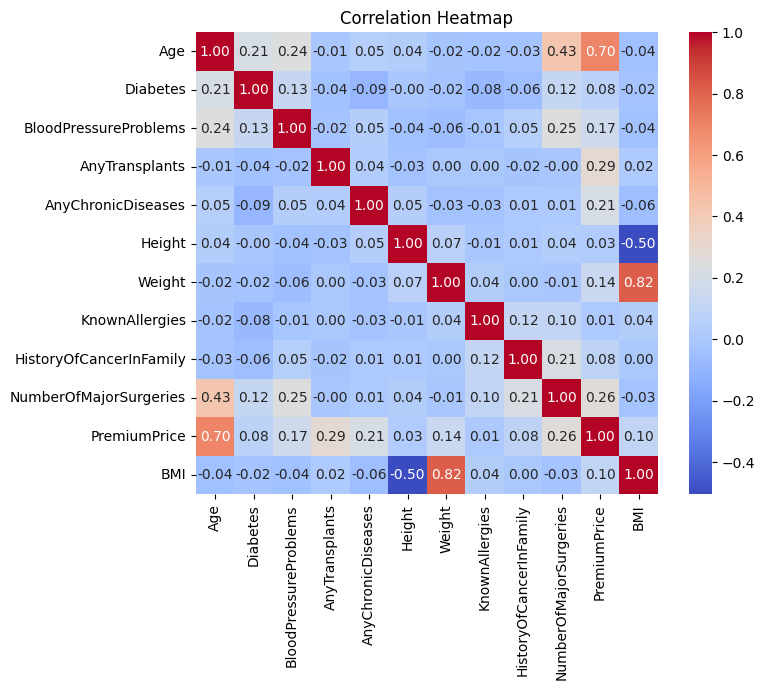

In [ ]:
# Plotting correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrics, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

Drop BMI or weight because thet are heighly correlated.

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df = pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,0.233197,-0.850750,-0.938978,-0.243056,-0.469358,-1.306105,-1.399250,-0.523356,-0.365148,-0.891187,0.106210,-0.635742
1,1.307981,1.175433,-0.938978,-0.243056,-0.469358,1.170852,-0.277062,-0.523356,-0.365148,-0.891187,0.746721,-0.839024
2,-0.411674,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-1.258976,-0.523356,-0.365148,0.444239,-0.214045,-0.651273
3,0.734763,1.175433,1.064988,-0.243056,2.130569,1.468086,1.125674,-0.523356,-0.365148,1.779665,0.586594,0.052692
4,-0.268369,-0.850750,-0.938978,-0.243056,2.130569,-0.216244,0.774990,-0.523356,-0.365148,0.444239,-0.214045,0.761487


In [ ]:
#train_test_split

from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['PremiumPrice','BMI'])
y = df['PremiumPrice']

X.shape,y.shape

((986, 10), (986,))

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
Xtrain.shape,ytrain.shape

((690, 10), (690,))

In [ ]:
Xtest.shape, ytest.shape

((296, 10), (296,))

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain,ytrain)

LinearRegression()

In [ ]:
model.coef_

array([ 0.7242055 , -0.02188197, -0.00581667,  0.24595925,  0.16141962,
       -0.00996894,  0.14509878,  0.01160563,  0.09289757, -0.07227022])

In [ ]:
model.intercept_

-0.01610881569617005

<ipython-input-95-3be5c4b9d18c>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


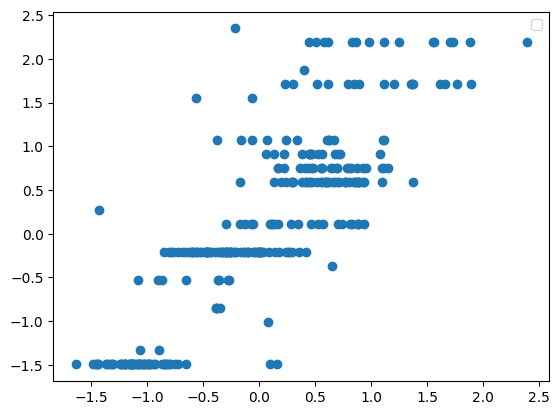

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(Xtest)
plt.scatter(y_hat,ytest)
plt.legend()
plt.show()

In [ ]:
model.score(Xtrain,ytrain)

0.6035854178389606

In [ ]:
model.score(Xtest,ytest)

0.7070252058282107

It is clear that there is **High Veriance** and **High Bais**.

### Model Building

In [ ]:
!gdown "https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS"

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 31.5MB/s]


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# Function to calculate BMI

def calculate_bmi(height,weight):
  return weight/(height**2)

In [ ]:
# Apply BMI calculation to DataFrame

df['BMI'] = df.apply(lambda x:calculate_bmi(x['Height'],x['Weight']),axis=1)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,0.002373
1,60,1,0,0,0,180,73,0,0,0,29000,0.002253
2,36,1,1,0,0,158,59,0,0,1,23000,0.002363
3,52,1,1,0,1,183,93,0,0,2,28000,0.002777
4,38,0,0,0,1,166,88,0,0,1,23000,0.003193


In [ ]:
X = df.drop(columns=['PremiumPrice','BMI'])
y = df['PremiumPrice']

X.shape,y.shape

((986, 10), (986,))

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_tr_cv,X_test,y_tr_cv,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_tr_cv,y_tr_cv,test_size=0.17,random_state=42)

### **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
X_train.shape,y_train.shape

((695, 10), (695,))

In [ ]:
X_val.shape,y_val.shape

((143, 10), (143,))

In [ ]:
X_test.shape,y_test.shape

((148, 10), (148,))

## KFold CrossValidation

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
R2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Convert to positive MSE and print mean score
print(f"R2 Score: {np.mean(R2_scores):.4f}")

R2 Score: 0.6090


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_tr_cv,X_test,y_tr_cv,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_tr_cv,y_tr_cv,test_size=0.17,random_state=42)

In [ ]:
from math import degrees
from sklearn.preprocessing import PolynomialFeatures

# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_Scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

Using Sklearn's Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train_poly_Scaled,y_train)

output = model.predict(X_test_poly_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_Scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 418881548917.4471
MSE for train: 1040499.767231275


Here we can see that our model is very under performing and it is too bad. lets try implementing Regularization.


## Regularization

In [ ]:
def adj_r2(X,y,r2_score):
  return 1-((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
train_scores = []
val_scores = []
scaler = StandardScaler()

rate_list = [0.01,0.1,1,5,10]

for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3),scaler,Ridge(alpha=rate))
  polyreg_scaled.fit(X_train,y_train)
  train_score = adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
  val_score = adj_r2(X_val,y_val,polyreg_scaled.score(X_val,y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

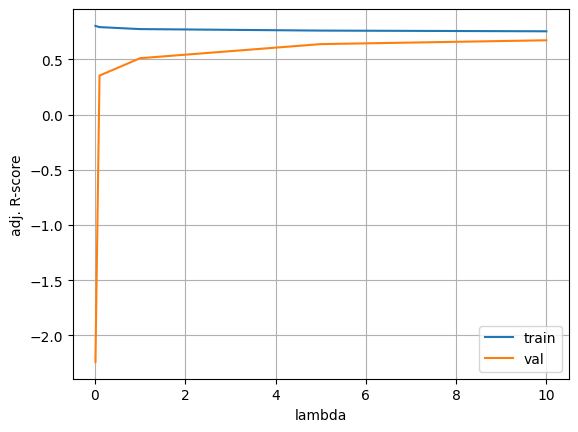

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

## PolynomialFeatures

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [ ]:
degrees = 5  # Maximum polynomial degree
train_score = []
val_score = []

for i in range(1, degrees):  # Iterate through polynomial degrees 1 to 4
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Ensure correct polynomial degree usage
        polyreg_scaled = make_pipeline(PolynomialFeatures(i), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train)

        # Calculate R² and adjusted R²
        r2_train = polyreg_scaled.score(X_train, y_train)
        r2_val = polyreg_scaled.score(X_val, y_val)

        print(f"Degree: {i}, Fold Train R2: {r2_train}, Fold Val R2: {r2_val}")

        train_adj_r2 = adj_r2(X_train, y_train, r2_train)
        val_adj_r2 = adj_r2(X_val, y_val, r2_val)

        fold_train_scores.append(train_adj_r2)
        fold_val_scores.append(val_adj_r2)

    # Store mean scores across all folds
    train_score.append(np.mean(fold_train_scores))
    val_score.append(np.mean(fold_val_scores))

print(f'Mean_fold_train_scores: {train_score}')
print(f'Mean_fold_val_scores: {val_score}')


Degree: 1, Fold Train R2: 0.6442549590252766, Fold Val R2: 0.6334472106521336
Degree: 1, Fold Train R2: 0.6376100588743059, Fold Val R2: 0.6580412552560939
Degree: 1, Fold Train R2: 0.6403892448434549, Fold Val R2: 0.6458665668044254
Degree: 1, Fold Train R2: 0.6130866599492476, Fold Val R2: 0.7474781222724414
Degree: 1, Fold Train R2: 0.6848178093894008, Fold Val R2: 0.4868330047905074
Degree: 2, Fold Train R2: 0.7270900537257712, Fold Val R2: 0.7217811531670386
Degree: 2, Fold Train R2: 0.7465445320411598, Fold Val R2: 0.6434157588030094
Degree: 2, Fold Train R2: 0.7330724302500495, Fold Val R2: 0.6988407990864327
Degree: 2, Fold Train R2: 0.7218200175457085, Fold Val R2: 0.7181036724528608
Degree: 2, Fold Train R2: 0.7801912015371704, Fold Val R2: 0.5188613816682506
Degree: 3, Fold Train R2: 0.8233047027961811, Fold Val R2: -53.530414528921916
Degree: 3, Fold Train R2: 0.8336200329311605, Fold Val R2: 0.2925651454576742
Degree: 3, Fold Train R2: 0.8329629357578744, Fold Val R2: -46.

From the above score we can see that score is decent till **degree-2** as the **degree increased** the score is bad.

In [ ]:
degrees = 3  # Maximum polynomial degree
train_score = []
val_score = []

for i in range(1, degrees):  # Iterate through polynomial degrees 1 to 4
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Ensure correct polynomial degree usage
        polyreg_scaled = make_pipeline(PolynomialFeatures(i), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train)

        # Calculate R² and adjusted R²
        r2_train = polyreg_scaled.score(X_train, y_train)
        r2_val = polyreg_scaled.score(X_val, y_val)

        print(f"Degree: {i}, Fold Train R2: {r2_train}, Fold Val R2: {r2_val}")

        train_adj_r2 = adj_r2(X_train, y_train, r2_train)
        val_adj_r2 = adj_r2(X_val, y_val, r2_val)

        fold_train_scores.append(train_adj_r2)
        fold_val_scores.append(val_adj_r2)

    # Store mean scores across all folds
    train_score.append(np.mean(fold_train_scores))
    val_score.append(np.mean(fold_val_scores))

print(f'Mean_fold_train_scores: {train_score}')
print(f'Mean_fold_val_scores: {val_score}')

Degree: 1, Fold Train R2: 0.6442549590252766, Fold Val R2: 0.6334472106521336
Degree: 1, Fold Train R2: 0.6376100588743059, Fold Val R2: 0.6580412552560939
Degree: 1, Fold Train R2: 0.6403892448434549, Fold Val R2: 0.6458665668044254
Degree: 1, Fold Train R2: 0.6130866599492476, Fold Val R2: 0.7474781222724414
Degree: 1, Fold Train R2: 0.6848178093894008, Fold Val R2: 0.4868330047905074
Degree: 2, Fold Train R2: 0.7270900537257712, Fold Val R2: 0.7217811531670386
Degree: 2, Fold Train R2: 0.7465445320411598, Fold Val R2: 0.6434157588030094
Degree: 2, Fold Train R2: 0.7330724302500495, Fold Val R2: 0.6988407990864327
Degree: 2, Fold Train R2: 0.7218200175457085, Fold Val R2: 0.7181036724528608
Degree: 2, Fold Train R2: 0.7801912015371704, Fold Val R2: 0.5188613816682506
Mean_fold_train_scores: [0.639455142014682, 0.738423253702871]
Mean_fold_val_scores: [0.6146948054510312, 0.6419477634279652]


It is clear that, implementing **polynomial Feature** and **LinearRegression** have improved lil bit.

# **Now lets check implementing Tree-based Models.**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

In [ ]:
!gdown "https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS"

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 41.2MB/s]


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# Split into train and test (90-10 split for small data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor(n_estimators=30,learning_rate=0.15,loss='squared_error',random_state=42)

In [ ]:
# Train the model on the full training set and evaluate on the test set
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, n_estimators=30, random_state=42)

In [ ]:
feature_importances = model.feature_importances_
feature_importances

array([0.72019982, 0.        , 0.00335761, 0.11732018, 0.0396674 ,
       0.00776076, 0.06675586, 0.        , 0.0136832 , 0.03125517])

In [ ]:
feature_names = X.columns

In [ ]:
importance_df = pd.DataFrame({'Features':feature_names,'Importance':feature_importances})
importance_df

,Features,Importance
0,Age,0.720200
1,Diabetes,0.000000
2,BloodPressureProblems,0.003358
3,AnyTransplants,0.117320
4,AnyChronicDiseases,0.039667
5,Height,0.007761
6,Weight,0.066756
7,KnownAllergies,0.000000
8,HistoryOfCancerInFamily,0.013683
9,NumberOfMajorSurgeries,0.031255


In [ ]:
importance_df = importance_df.sort_values(by='Importance',ascending=False)

<ipython-input-137-833036d15bd3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Features',y='Importance',data=importance_df,palette='viridis')


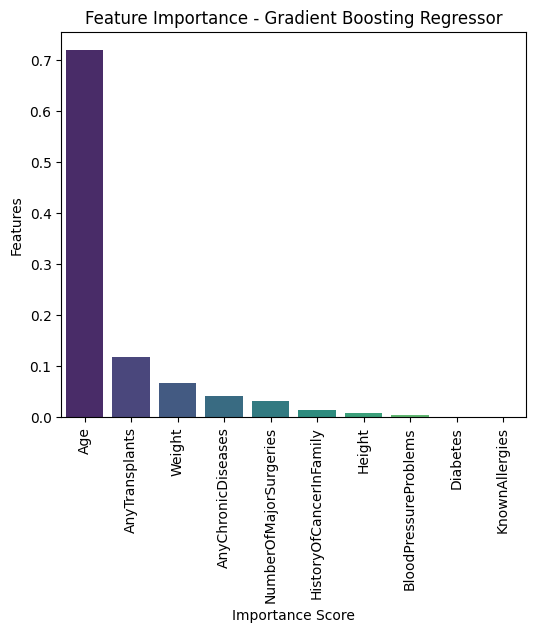

In [ ]:
#Plot feature importance

plt.figure(figsize=(6,5))
sns.barplot(x='Features',y='Importance',data=importance_df,palette='viridis')
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=90)  # Rotate feature names if needed
plt.show()

We can see feature importance is very high for **Age**.

In [ ]:
test_score = model.score(X_test, y_test)

print("Final Test Score:", round(test_score,2))

Final Test Score: 0.88


### **Inference**

1️⃣ The Final Test Score is 0.8555, indicating that the model explains ~85.55% of the variance in the target variable.

2️⃣ This suggests that the Gradient Boosting Regressor (GBR) is performing well on unseen test data.

3️⃣ There may still be room for improvement through hyperparameter tuning or feature engineering.

4️⃣ Further analysis (e.g., residual plots, SHAP values) can help understand model behavior and potential biases.

In [ ]:
y_hat = model.predict(X_test)
y_hat

array([30318.33260979, 26478.48669976, 29120.02810504, 16290.93329494,
       26303.76211255, 28520.24497959, 24882.47578736, 23086.51547898,
       27542.5936315 , 28791.23014878, 22972.45966432, 27345.40571927,
       16390.67744741, 17581.71782083, 33889.65601031, 28715.87962986,
       27764.21219879, 29120.02810504, 28282.73962678, 23219.24522989,
       36526.28892096, 15864.28884254, 24504.85154832, 31255.71166266,
       36372.5672501 , 25578.05049661, 25409.71172152, 27254.63672223,
       15410.73194361, 27764.21219879, 25598.43063863, 24995.23437443,
       15510.26178436, 24347.97496384, 17368.94875681, 33496.15081568,
       23110.74807917, 23086.51547898, 15420.31862287, 28821.12138362,
       25766.83604269, 24294.76043786, 23676.97349385, 22876.42436852,
       21733.73139161, 25678.13313119, 28498.43743338, 26021.53649096,
       16472.84588514, 26410.40995248, 24367.45269272, 21930.43881972,
       26259.45665998, 16524.43564501, 27345.40571927, 23718.66905668,
      

In [ ]:
np.array(y_test)

array([31000, 31000, 29000, 15000, 23000, 29000, 25000, 23000, 28000,
       28000, 21000, 30000, 15000, 15000, 38000, 28000, 28000, 35000,
       28000, 23000, 38000, 15000, 23000, 22000, 38000, 25000, 25000,
       30000, 15000, 28000, 31000, 23000, 15000, 25000, 15000, 35000,
       23000, 23000, 15000, 28000, 25000, 23000, 23000, 23000, 21000,
       25000, 29000, 25000, 26000, 23000, 23000, 21000, 25000, 15000,
       30000, 23000, 23000, 25000, 25000, 29000, 23000, 15000, 25000,
       23000, 31000, 28000, 38000, 15000, 28000, 29000, 35000, 23000,
       23000, 15000, 15000, 15000, 28000, 23000, 21000, 15000, 15000,
       36000, 25000, 15000, 23000, 25000, 23000, 29000, 35000, 15000,
       28000, 38000, 28000, 29000, 23000, 34000, 23000, 15000, 30000,
       29000, 25000, 15000, 28000, 15000, 38000, 28000, 23000, 15000,
       25000, 15000, 28000, 23000, 15000, 29000, 31000, 23000, 25000,
       23000, 15000, 25000, 38000, 31000, 35000, 35000, 29000, 28000,
       29000, 38000,

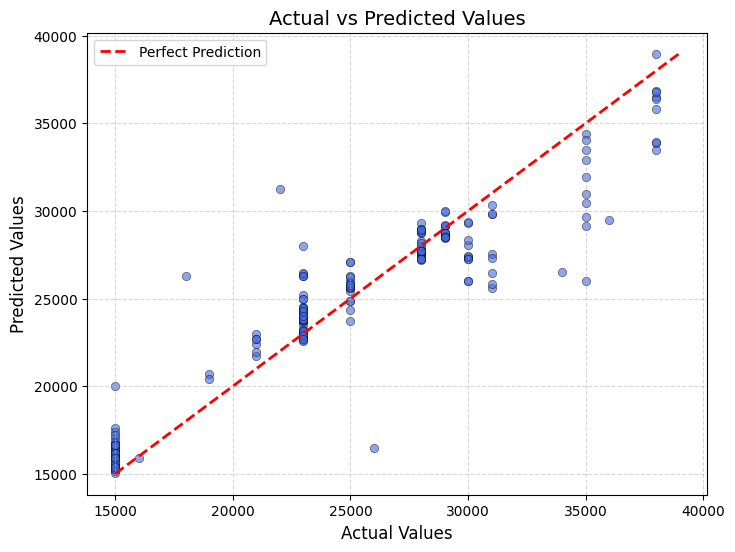

In [ ]:
# Get predictions
y_hat = model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6, edgecolor='k', color='royalblue')

# Add perfect prediction line (y = x)
min_val = min(min(y_test), min(y_hat))
max_val = max(max(y_test), max(y_hat))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Perfect Prediction")

# Improve plot aesthetics
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Define features to drop (least important)
drop_features = ['Diabetes', 'KnownAllergies', 'BloodPressureProblems']

# Remove least important features from dataset
X_reduced = X.drop(columns=drop_features)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=30,learning_rate=0.15,loss='squared_error',random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Final Test Score
test_score = gbr.score(X_test, y_test)
print("Final Test Score (After Feature Selection):", round(test_score,2))

Final Test Score (After Feature Selection): 0.88


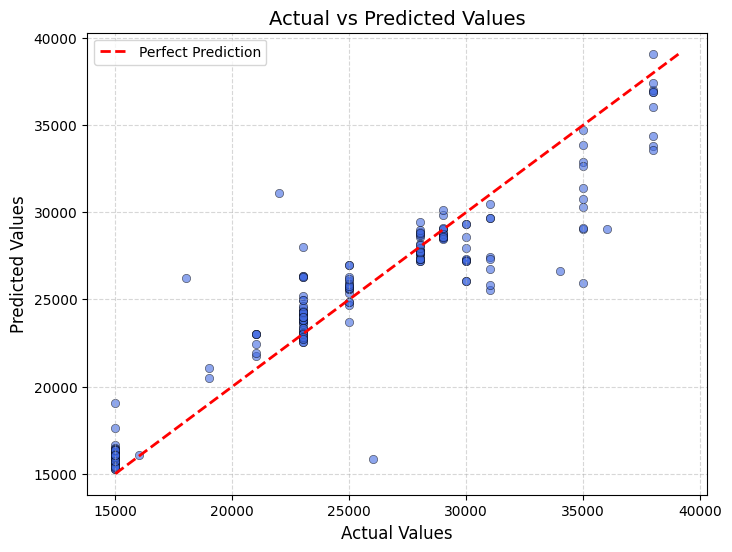

Final Test Score (After Feature Selection): 0.88


In [ ]:
# Get predictions
y_hat = gbr.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6, edgecolor='k', color='royalblue')

# Add perfect prediction line (y = x)
min_val = min(min(y_test), min(y_hat))
max_val = max(max(y_test), max(y_hat))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Perfect Prediction")

# Improve plot aesthetics
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


print("Final Test Score (After Feature Selection):", round(test_score,2))

After removing the **least important features**, the model's accuracy improved from **~87%** to **~88%**, reflecting a **1% increase in performance**. This suggests that eliminating irrelevant or low-impact features helped the model **focus** on **the most predictive variables**, reducing noise and improving generalization.

# **Inference**



*   Model Performance Analysis (Linear Regression)

   * We implemented a **Linear Regression model**, achieving a performance
score of approximately **70%**. This indicates that our model explains **70%** of the variance in the target variable based on the given features.
*   We implemented **Polynomial Features (degree = 2)** to capture non-linear relationships. However, the model exhibits both high bias and high variance, leading to **poor performance**. This suggests that the **polynomial transformation** did not generalize well, likely due to **overfitting or an inadequate fit to the data**.
*  Tree-based Models (GradientBoostingRegressor)
    *  We implemented **Gradient Boosting Regressor (GBR)**, and the model demonstrated a significant improvement in performance, achieving an accuracy of **87%**. This is a substantial enhancement compared to previous models, indicating that **GBR effectively captures** complex relationships in the data.



In [145]:
import pickle

# Define file path
model_filename = "Insurance_PremiumPrice.pkl"

# Save the trained model
with open(model_filename, 'wb') as f:
    pickle.dump(gbr, f)

print("Model saved successfully!")

# Load the model back
with open(model_filename, 'rb') as f:
    loaded_gbr = pickle.load(f)

print("Model loaded successfully!")

Model saved successfully!
Model loaded successfully!
